# Линейная регрессия

Данные содержатся в файле `data/lin_reg.txt`. Прочитать их можно следующим так:

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
D = np.loadtxt('lin_reg.txt', delimiter=',')
X = D[:, :-1]
Y = D[:, -1]
%matplotlib inline

sns.set(style="darkgrid")

При выполнении заданий **нельзя** пользоваться `scikit-learn` и т.п., только `NumPy`/`JAX`/`TF`/`PyTorch` и `matplotlib`/`seaborn`/`plotly`/etc.

1. Нарисуйте график среднеквадратичной ошибки в зависимости от параметра регуляризации $\alpha$, используя полные данные для обучения и для тестирования. 
2. Подготовьте исходные данные для 5 fold CV.
3. С помощью CV найдите оптимальное значение $\alpha$ на какой-нибудь сетке значений.
4. Постройте валидационную кривую. 
5. Постройте кривую обучения.

In [13]:
int(X.shape[0]*0.8)

800

In [14]:
class MyLinearRegression:
  def __init__(self,alpha=1, lr=1e-3,eps=1e-4,max_iter=1000,bias=True):
    self.alpha = alpha
    self.lr = lr
    self.eps = eps
    self.max_iter = max_iter
    if bias:
      self.bias = np.random.normal()
    else:
      self.bias = 0
    np.random.seed(42)

  def fit(self,X,y):
    self.w = np.random.normal(size=X.shape[1])
    self.losses = []
    for _ in range(self.max_iter):
      prev_bias, prev_w = self.bias, self.w.copy()

      pred = self.predict(X)
      bias_grad =  np.mean((pred - y) * 2, axis = 0)
      W_grad = 2 * X.T @ (pred - y) / y.shape[0] + self.alpha * np.sign(self.w)
      self.bias -= self.lr * bias_grad
      self.w -= self.lr * W_grad
      prev_vector = np.append(prev_w, prev_bias)
      current_vector = np.append(self.w, self.bias)
            
      self.losses.append(self.calculate_loss(X, y))
      if np.linalg.norm(current_vector - prev_vector) < self.eps:
          break



  def predict(self,X):
    return X @ self.w + self.bias
  def calculate_loss(self, X, y): 
      return np.mean((self.predict(X) - y) ** 2) + self.alpha * np.linalg.norm(self.w, ord=1)



In [15]:
model = MyLinearRegression()

In [16]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

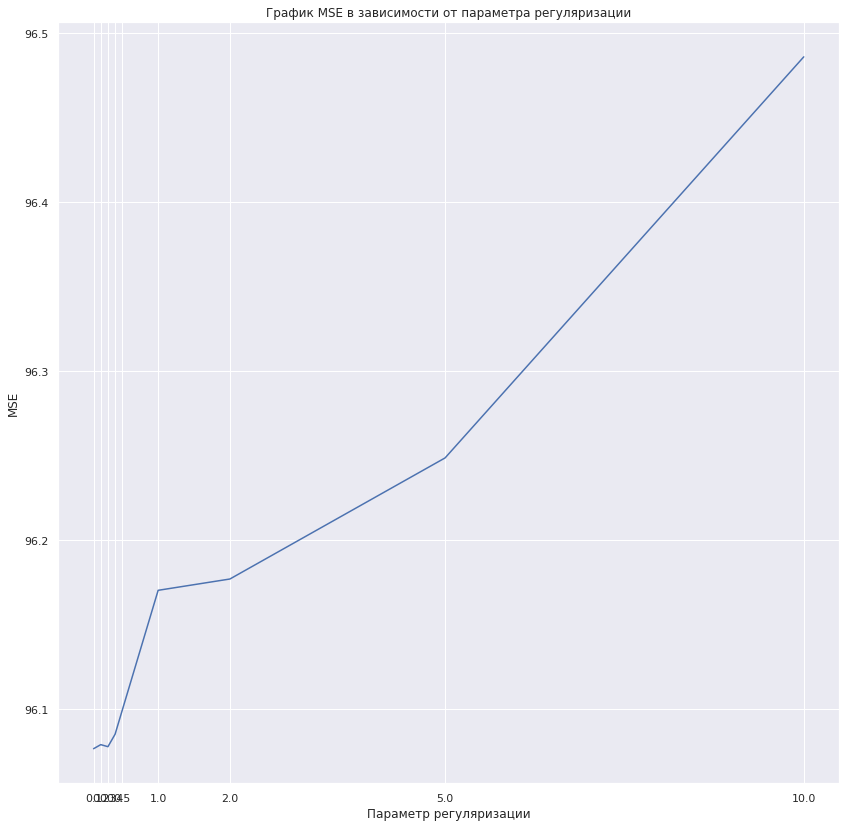

In [17]:
alphas =  [0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 5, 10]
alpha_losses_dict = dict()
for alpha in alphas:
  model = MyLinearRegression(alpha=alpha)
  model.fit(X,Y)
  pred = model.predict(X)
  alpha_losses_dict[alpha] = mean_squared_error(Y,pred)
lists = sorted(alpha_losses_dict.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.figure(figsize=(14, 14))
plt.title('График MSE в зависимости от параметра регуляризации')
plt.xlabel('Параметр регуляризации')
plt.ylabel('MSE')
plt.plot(x, y)
plt.xticks(x)
plt.show()

In [18]:
def cross_val(X,y,folds):
  
  X_train_data = []
  y_train_data = []
  X_test_data = []
  y_test_data = []
  step = X.shape[0]/folds
  for start in range(0,int(X.shape[0]),int(step)):
    stop = start + step
    stop = int(stop)
    X_test_data.append(X[start:stop])
    y_test_data.append(y[start:stop])
    X_train_data.append(np.concatenate((X[:start],X[stop:])))
    y_train_data.append(np.concatenate((y[:start],y[stop:])))
  return X_train_data,y_train_data,X_test_data,y_test_data,folds

In [19]:
X_train_data,y_train_data,X_test_data,y_test_data,folds = cross_val(X,Y,5)
alpha_losses_dict = dict()
alphas = [0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 5, 10]
for alpha in alphas:
  model = MyLinearRegression(alpha=alpha)
  losses_sum = 0
  for i in range(len(X_train_data)):
    model.fit(X_train_data[i],y_train_data[i])
    pred = model.predict(X_test_data[i])
    current_loss = mean_squared_error(y_test_data[i],pred)
    losses_sum+=current_loss
    
  alpha_losses_dict[alpha] = losses_sum/folds


In [20]:
print(alpha_losses_dict)

{0.1: 97.15963979872743, 0.2: 97.14022944538605, 0.3: 97.13420592426738, 0.4: 97.13089512854665, 0.5: 97.13049095173193, 1: 97.08583322901595, 2: 96.92881859837348, 5: 96.86816747709258, 10: 97.04223986754441}


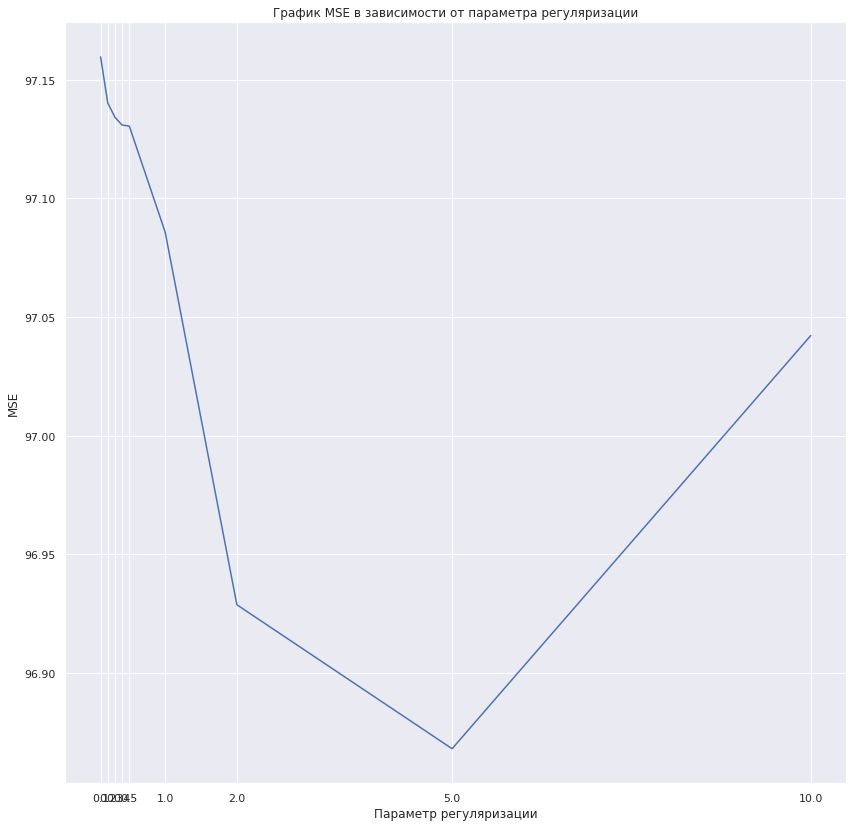

In [21]:
lists = sorted(alpha_losses_dict.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.figure(figsize=(14, 14))
plt.title('График MSE в зависимости от параметра регуляризации')
plt.xlabel('Параметр регуляризации')
plt.ylabel('MSE')
plt.plot(x, y)
plt.xticks(x)
plt.show()